# Graphics

Zhentao Shi

<!-- code is tested on SCRP -->


China's microeconomic datasets [link](https://zhuanlan.zhihu.com/p/30588976)

Chinese Longitudinal Healthy Longevity Survey [link](https://www.icpsr.umich.edu/web/NACDA/studies/36692)

China Household Finance Survey [link](https://chfs.swufe.edu.cn/)


An English cliché says "One picture is worth ten thousand words".
John Tukey, a renowned mathematical statistician, was one of the pioneers of statistical graphs
in the computer era. 

Nowadays, powerful software is able to produce dazzling statistical graphs, sometimes web-based and interactive. Outside of academia, journalism hooks a wide readership with professional data-based graphs. New York Times and The Economists are first-rate examples; South China Morning Post sometimes also does a respectable job.

A well designed statistical graph can deliver an intuitive and powerful message.
I consider graph prior to table when writing a research report or an academic paper.
Graph is lively and engaging. Table is tedious and boring.

## Simple graphs

### Time Series

- Natural ordering of observations
- A single realization in history

In [1]:
library(magrittr)
library(dplyr)
library(doBy)
library(zoo)
library(rvest)
library(Quandl)

Warning message:
"package 'magrittr' was built under R version 4.1.3"
Warning message:
"package 'dplyr' was built under R version 4.1.3"

Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Warning message:
"package 'doBy' was built under R version 4.1.3"

Attaching package: 'doBy'


The following object is masked from 'package:dplyr':

    order_by


Warning message:
"package 'zoo' was built under R version 4.1.3"

Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric


Warning message:
"package 'rvest' was built under R version 4.1.3"
Warning message:
"package 'Quandl' was built under R version 4.1.3"
Loading required package: xts

Warning message:
"package 'xts' was built under R version 4.1.3"

Attaching package: 'xts'


The following objects are masked from 'package:dplyr':

    

- Macroeconomic applications
  - 国家统计局 [National Bureau of Statistics](https://data.stats.gov.cn/easyquery.htm?cn=B01)
  - Federal Reserve [FRED database](https://research.stlouisfed.org/econ/mccracken/fred-databases/)

- Financial applications
  - [Yahoo Finance](https://finance.yahoo.com/)

## HK GDP

* [link](https://www.censtatd.gov.hk/en/web_table.html?id=33#)
With API

## China's GDP

* 国家统计局 [National Bureau of Statistics](https://data.stats.gov.cn/easyquery.htm?cn=B01)
* API (Application Programming Interface) is provided  [FRED's webpage](https://fred.stlouisfed.org/series/MKTGDPCNA646NWDB)

## US GDP

* GDP is provided by [BEA](https://www.bea.gov/data/gdp/gross-domestic-product)

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



[1] "MKTGDPCNA646NWDB"

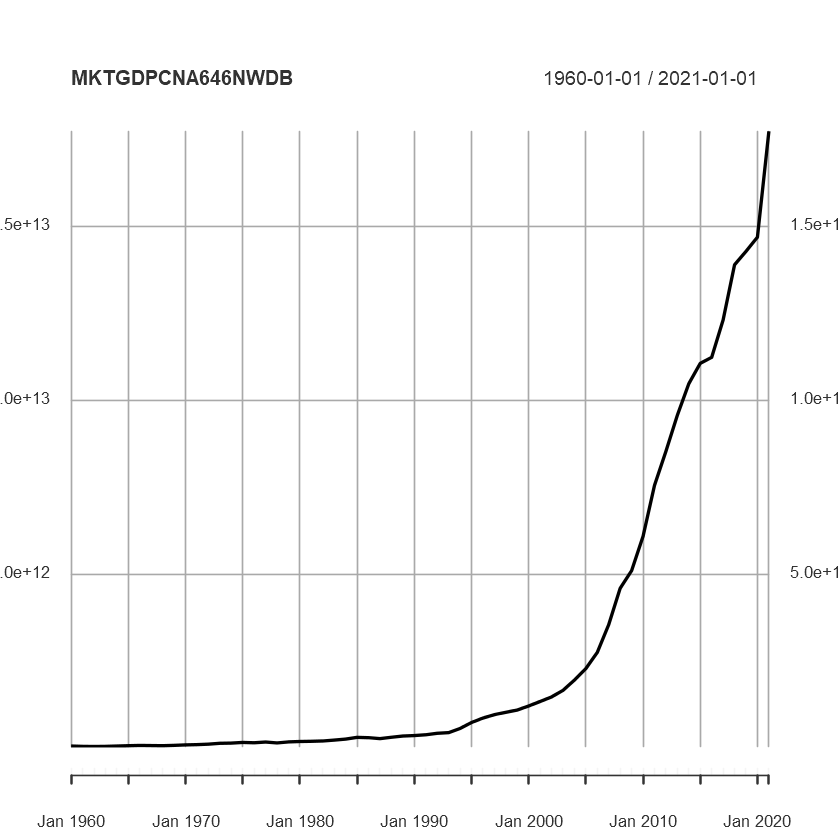

In [2]:
quantmod::getSymbols.FRED(Symbols = "MKTGDPCNA646NWDB", env = .GlobalEnv) 
plot(MKTGDPCNA646NWDB)

### Shanghai Composite Index

Warning message:
"000001.SS contains missing values. Some functions will not work if objects contain missing values in the middle of the series. Consider using na.omit(), na.approx(), na.fill(), etc to remove or replace them."


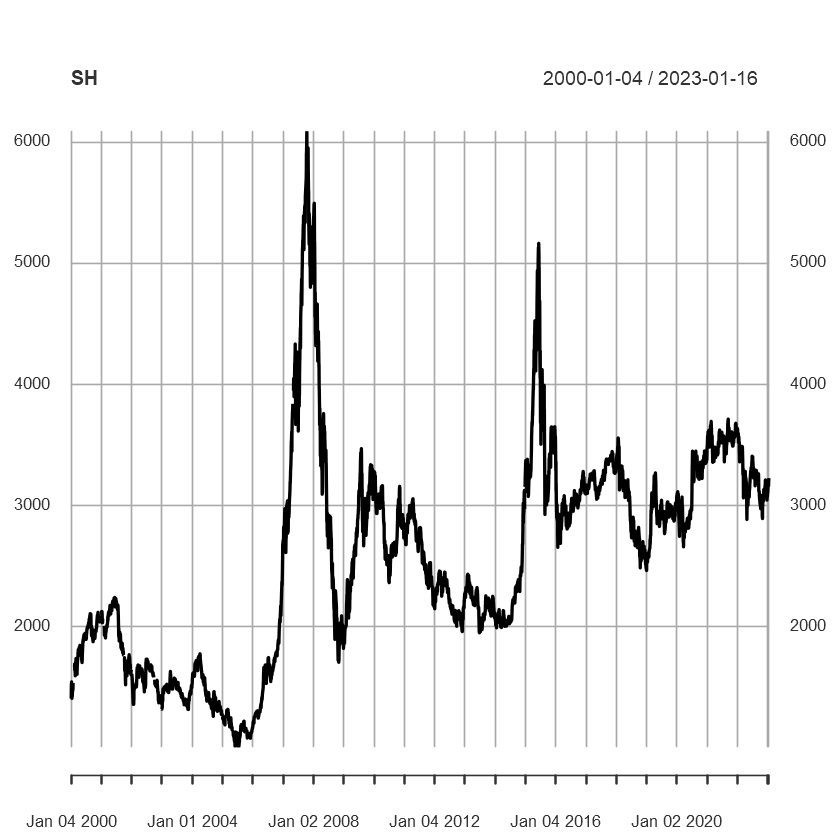

In [3]:
tick = "000001.SS" # need to find the tick 
SH <- quantmod::getSymbols(tick, auto.assign = FALSE, 
         from = "2000-01-01")[, paste0(tick,".Close")]

plot(SH)

### 000001.SS Return

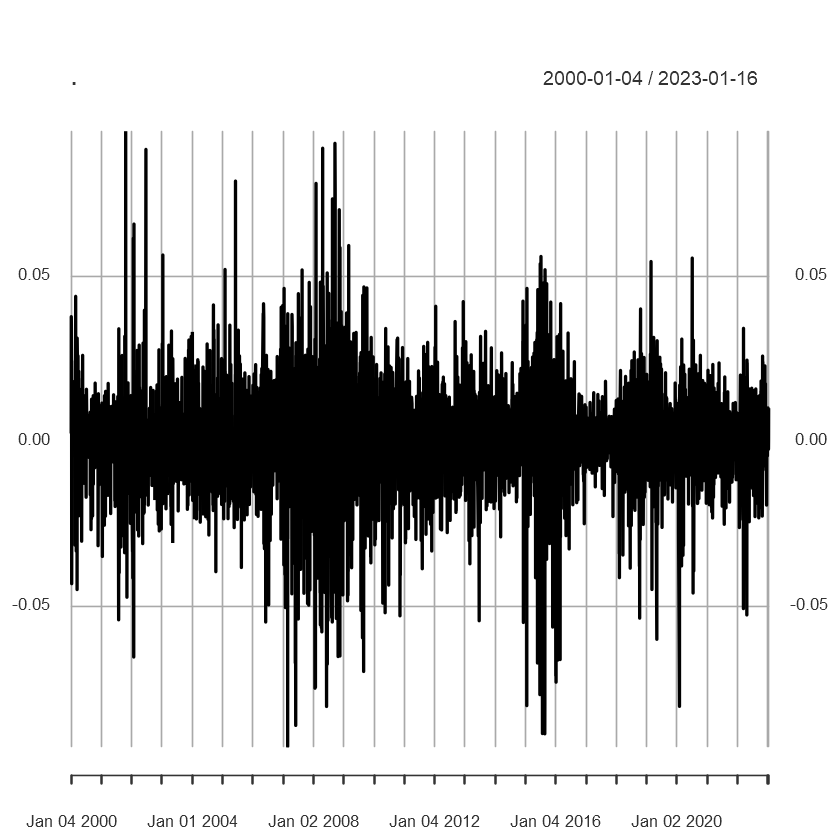

In [4]:
diff(log(SH)) %>% plot

### Bitcoin

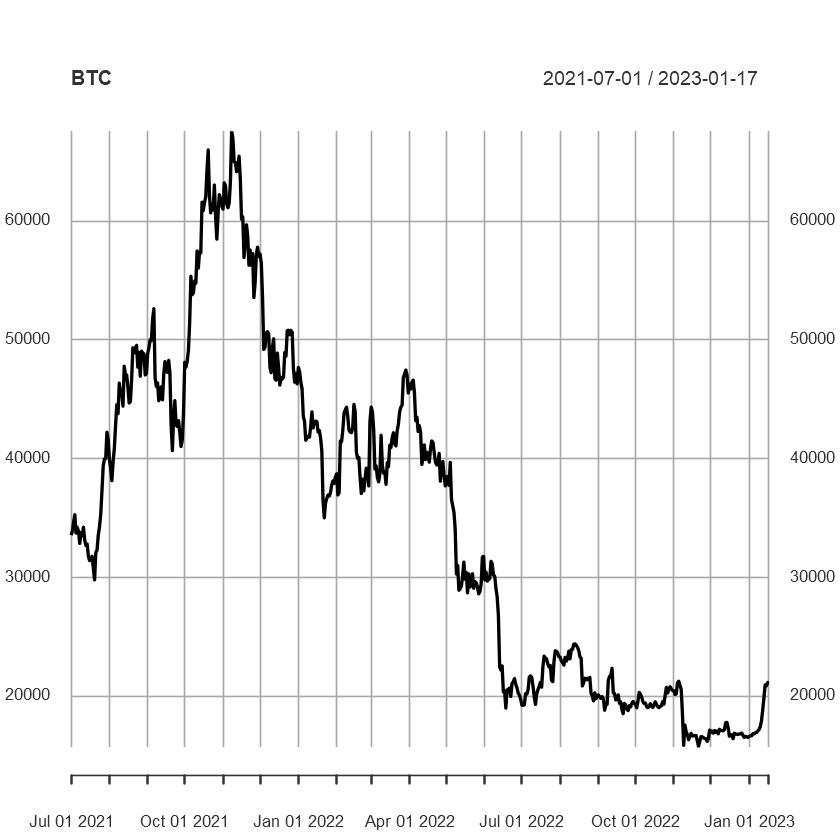

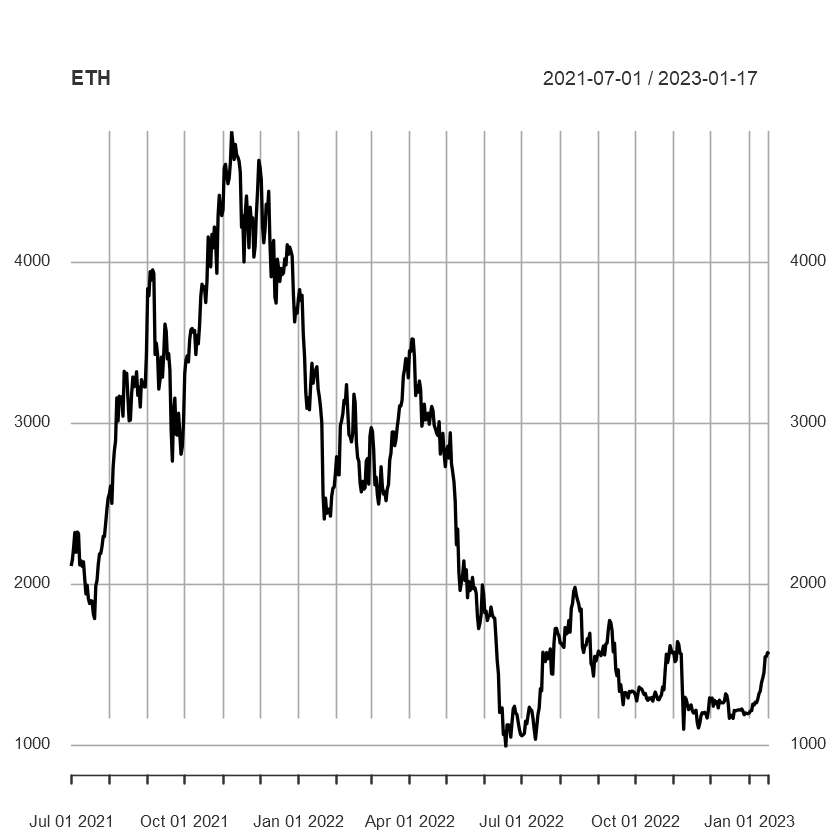

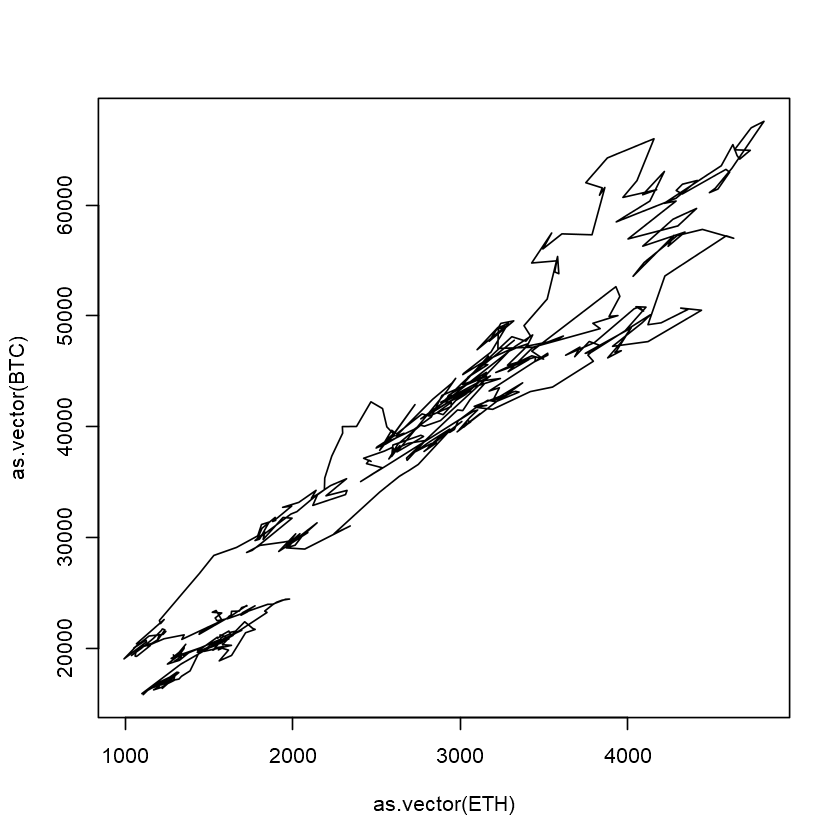

In [5]:
BTC <- quantmod::getSymbols("BTC-USD",auto.assign = FALSE, from = "2021-07-01")[,4]
plot(BTC)

ETH <- quantmod::getSymbols("ETH-USD",auto.assign = FALSE, from = "2021-07-01")[,4]
plot(ETH)

plot( x = as.vector(ETH), y = as.vector(BTC), type = "l")

### Bitcoin return

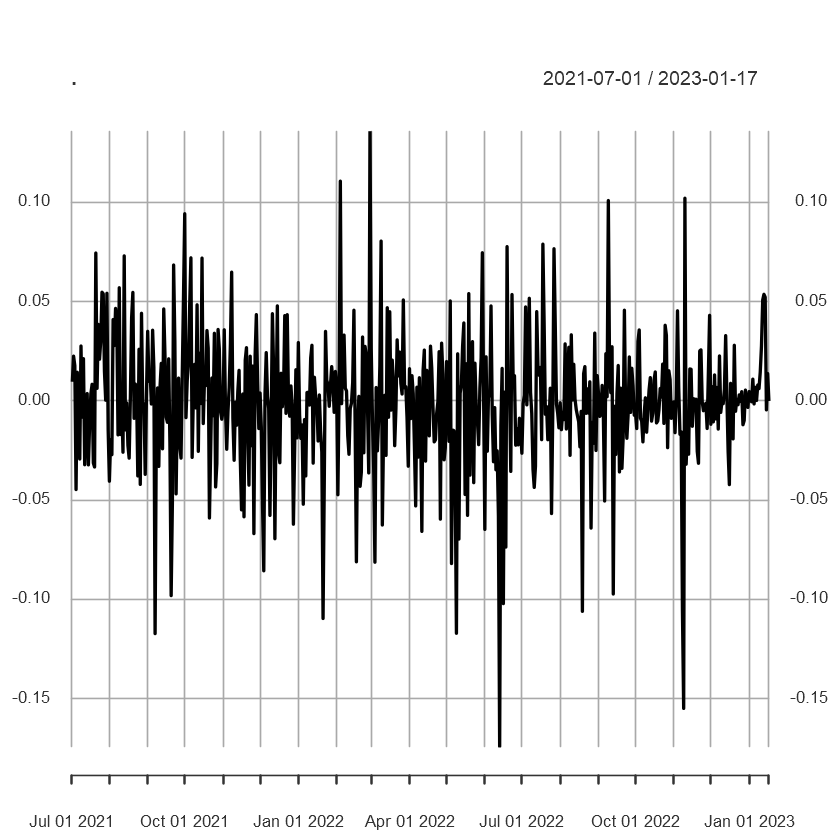

In [6]:
diff( log(BTC) ) %>% plot( )

### Exchange rates

[1] "USD/JPY"

[1] "HKD/JPY"

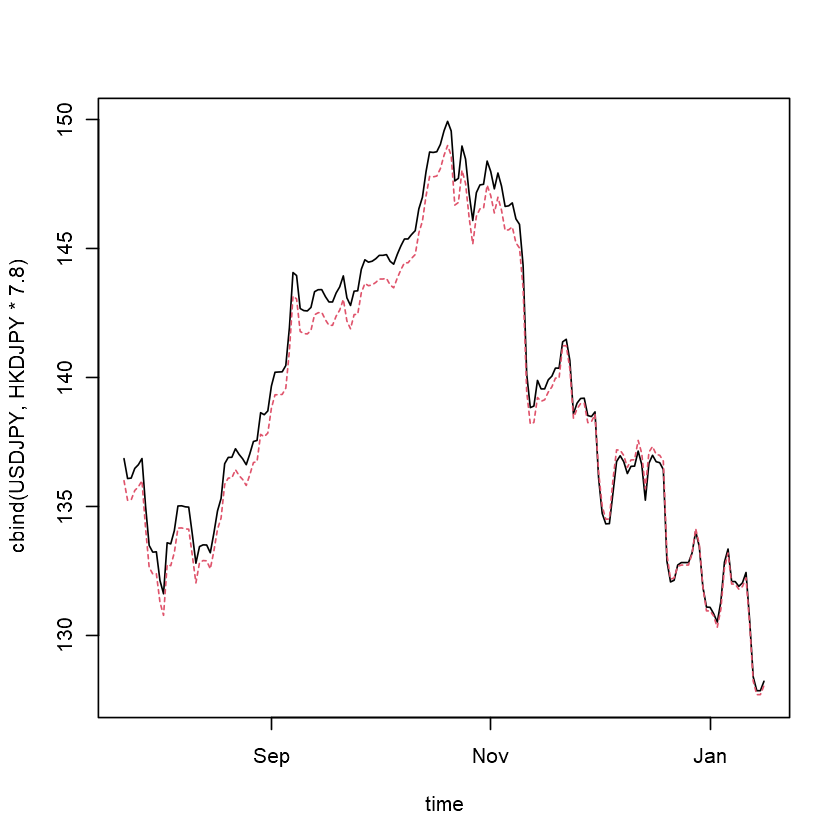

In [7]:
quantmod::getFX("USD/JPY")
quantmod::getFX("HKD/JPY")
matplot( y = cbind(USDJPY, HKDJPY*7.8), x = index(USDJPY), type = "l", xlab = "time"  )

## GGplot2


We have seen an example of R graph in the OLS regression linear example in Lecture 1.
`plot` is a generic command for graphs, and is the default R graphic engine.
It is capable of producing preliminary statistical graphs.

Over the years, developers all over the world have had many proposals for
more sophisticated statistical graphs. Hadley Wickham's 
`ggplot2` is among the most successful. 



`ggplot2` is an advanced graphic system that generates high-quality statistical graphs.
It is not possible to cover it in a lecture. Fortunately, the author wrote a comprehensive reference
[**ggplot2 book**](http://link.springer.com/book/10.1007%2F978-0-387-98141-3),
which can be downloaded via the CUHK campus network (VPN needed).

`ggplot2` accommodates data frames of a particular format. `reshape2` is a package that helps prepare the data frames for `ggplot2`.

The workflow of ggplot is to add the elements in a graph one by one, and then print out
the graph all together.
In contrast, `plot` draws the main graph at first, and then adds the supplementary elements later.

`ggplot2` is particularly good at drawing multiple graphs, either of the same pattern or of
different patterns. Multiple subgraphs convey rich information and easy comparison.


### Example

Plot the density of two estimators under three different data generating processes.
This is an example to generate subgraphs of the same pattern.


Warning message:
"package 'ggplot2' was built under R version 4.1.3"
Warning message:
"package 'reshape2' was built under R version 4.1.3"


      typb           b1        b1_c
12001   FE  0.124616242  0.11690387
12002   FE  0.267670157  0.25202802
12003   FE -0.030689329 -0.03976746
12004   FE  0.121169923  0.11866138
12005   FE  0.008300031 -0.02399673
12006   FE -0.026199118 -0.05231120
  typb estimator        value
1   FE        b1  0.124616242
2   FE        b1  0.267670157
3   FE        b1 -0.030689329
4   FE        b1  0.121169923
5   FE        b1  0.008300031
6   FE        b1 -0.026199118


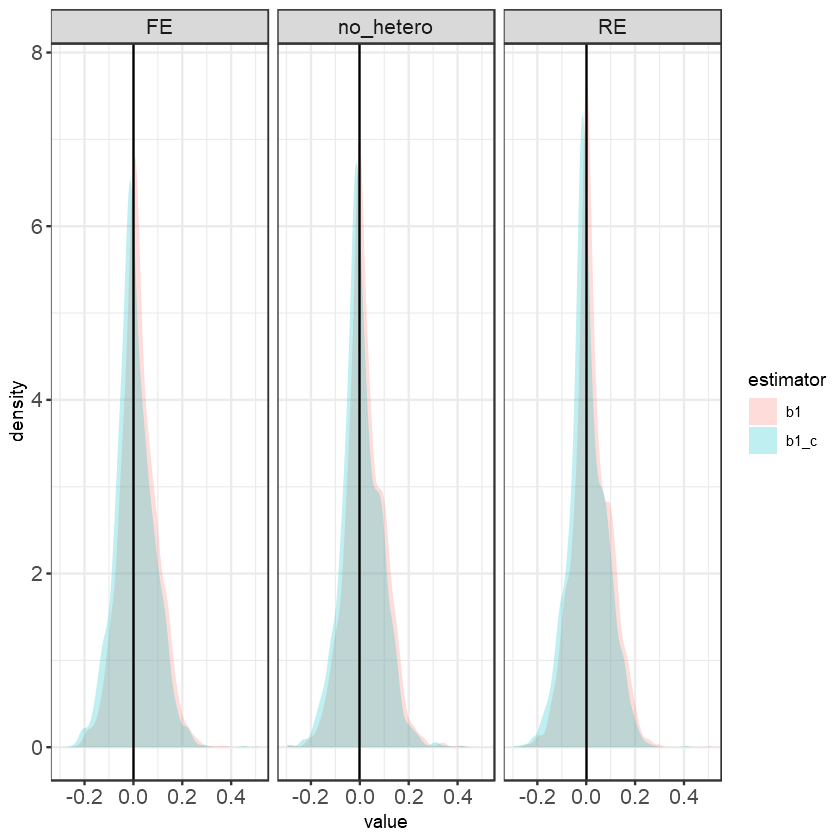

In [8]:
load("data_example/big150.Rdata")
library(ggplot2)
library(reshape2)

big150_1 <- big150[, c("typb", "b1", "b1_c")]
print(head(big150_1))

big150_1 <- melt(big150_1, id.vars = "typb", measure.vars = c("b1", "b1_c"))
names(big150_1)[2] <- c("estimator")
print(head(big150_1))

p1 <- ggplot(big150_1)
p1 <- p1 + geom_area(
  stat = "density", alpha = .25,
  aes(x = value, fill = estimator), position = "identity"
)
p1 <- p1 + facet_grid(. ~ typb)
p1 <- p1 + geom_vline(xintercept = 0)
p1 <- p1 + theme_bw()
p1 <- p1 + theme(
  strip.text = element_text(size = 12),
  axis.text = element_text(size = 12)
)
print(p1)

The function `ggplot` specifies which dataset to use for the graph. `geom_***` determines the shape to draw, for example scatter dots, lines, curves or areas. `theme` is to tune the supplementary elements like the background, the size and font of the axis text and so on.

### Example

This example aligns two graphs of different patterns in one page.
Similar graphs appear in [Shi and Zheng, 2018](https://onlinelibrary.wiley.com/doi/abs/10.1002/jae.2640).



Warning message:
"package 'gridExtra' was built under R version 4.1.3"

Attaching package: 'gridExtra'


The following object is masked from 'package:dplyr':

    combine




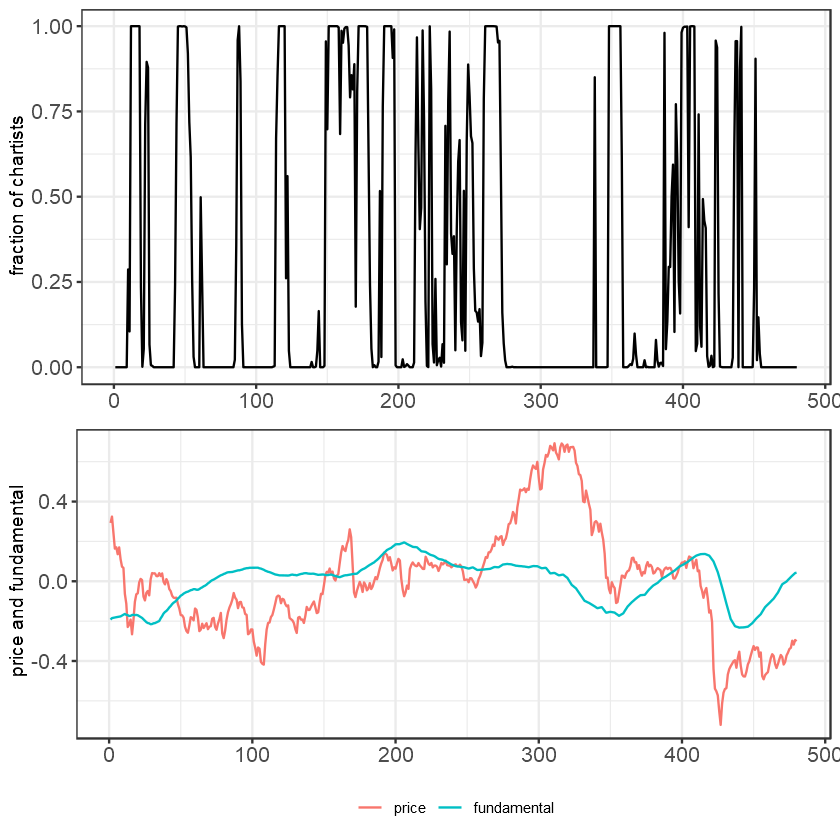

In [9]:
# graph packages
library(lattice)
library(ggplot2)
library(reshape2)
library(gridExtra)

load("data_example/multigraph.Rdata") # load data


# unify the theme in the two graphs
theme1 <- theme_bw() + theme(
  axis.title.x = element_blank(),
  strip.text = element_text(size = 12),
  axis.text = element_text(size = 12),
  legend.position = "bottom", legend.title = element_blank()
)

# sub-graph 1
d1 <- data.frame(month = 1:480, m = m_vec)
p1 <- qplot(x = month, y = m, data = d1, geom = "line")
p1 <- p1 + theme1 + ylab("fraction of chartists")


# sug-graph 2
d2$month <- 1:480
p2 <- ggplot(d2)
p2 <- p2 + geom_line(aes(x = month, y = value, col = variable))
p2 <- p2 + theme1 + ylab("price and fundamental")

# generate the grahp
grid.arrange(p1, p2, nrow = 2)


In order to unify the theme of the two distinctive subgraphs,
we define an object `theme1` and apply it in both graphic objects
`p1` and `p2`.

### Interactive Graph

In the folder of `data_example`, we give a preliminary example 
of `flexdashboard`. It is very easy to convert a ggplot2 graph 
into an HTML interactive graph by `plotly::ggplotly()`.

## Shiny App

Sometimes, we want the graphs to be interactive so the users can do more exploration with it. **Interactive Graph** means that the users can provide the customized input, and the graph will present the corresponding outcome. **Shiny App** is a web-based R package for interactive graph. The details can refer to the [tutorial](https://shiny.rstudio.com/tutorial/)

Shiny mainly consists of two equally important parts. 

* The UI for the interface of Shiny
* The Server for the calculation of input data.

## User Interface

The user interface for Shiny is defined by codes. We can use R scripts to desige the UI on the website. For instance, we can desige a window for input of numbers, or we can define the style of the bar graph.

## Server

If we want to calculate some statistics and summarize it to a graph. We must have the algorithm to tell the computer how to do the math. Server is the brain in the Shiny, which accounts for the remote computing. And its calculation is **reactive**. Whenever there's any new input from UI, it will automatically conduct the algorithm again and display the results.

### Example

Shiny has eleven built-in examples to demonstrate what it's capable of. We can learn them by `runExample()`. We also have a example for shiny in the folder `data_example`.

## Example

In the folder `data_example`, we also have a simple demostration for `flexdashboard`. We can use the command `plotly::ggplotly()` to covert a GGplot2 graph into an interactive HTML graph.